In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns


df = pd.read_csv("data/Portuguese.csv")

profile = ProfileReport(df, title="Pandas Profiling Report")



In [25]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The data don't show any obvious corralations between various groups. An interesting is the corralation between age and grade. The the answers for alcohol consumption does not interesting overlaps at this point. 

In [26]:
df.describe().T.style.background_gradient(cmap = "viridis")

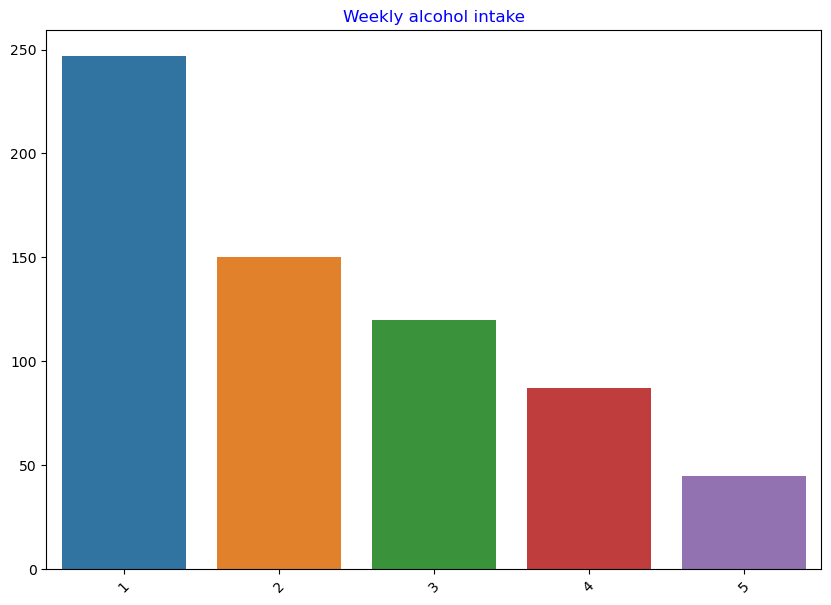

In [27]:
top = df['Walc'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Weekly alcohol intake',color = 'blue')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
le = LabelEncoder()

X = df.loc[:, ('Walc','Dalc','health','G3','absences','failures','freetime')]


y = df['Walc']

X['Walc'] = le.fit_transform(X['Walc'])

y = le.transform(y)

from sklearn.cluster import KMeans

nclusters = 2
seed = 2

km = KMeans(n_clusters=nclusters, random_state=seed, algorithm='elkan')
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.43660261246265786

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


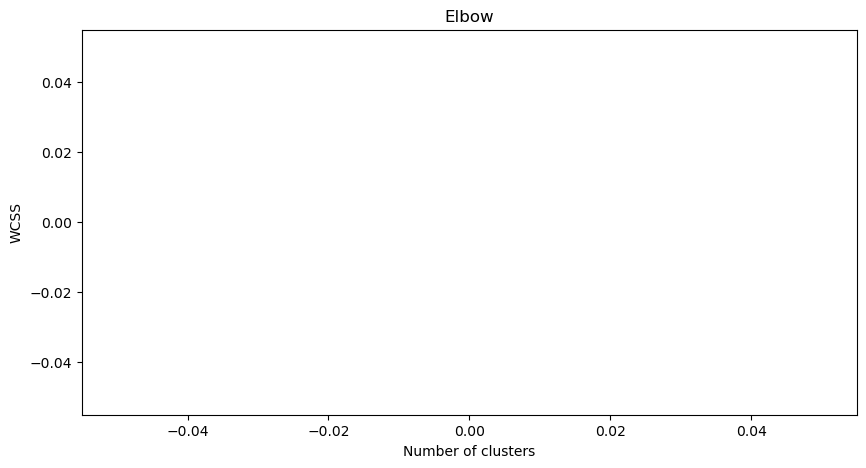

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,5))
sns.lineplot( wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

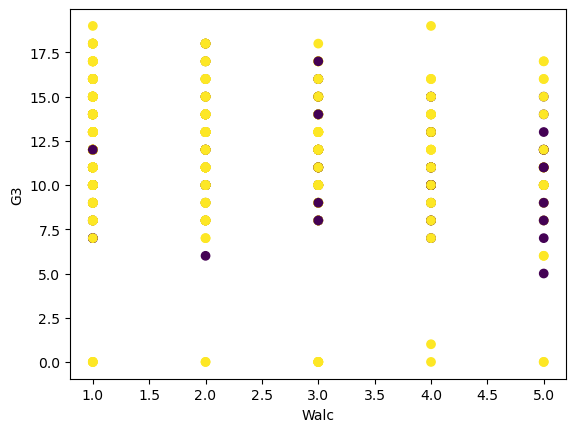

Result: 152 out of 649 samples were correctly labeled.
Accuracy score: 0.23


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['Walc'],df['G3'],c = labels)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Couldn't find a clear link and high score between weekly alcohol intake and any of the categories. 
I choose a dataset with clear explanations on the categories, while it was also complete. Increasing the number of clusters above 2 gave a worse results. 

Will try to continue with t-sne after deadline. 

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X) 
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]





/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 649 samples in 0.000s...
[t-SNE] Computed neighbors for 649 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 649 / 649
[t-SNE] Mean sigma: 1.477711
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.991486
[t-SNE] KL divergence after 1000 iterations: 0.768758


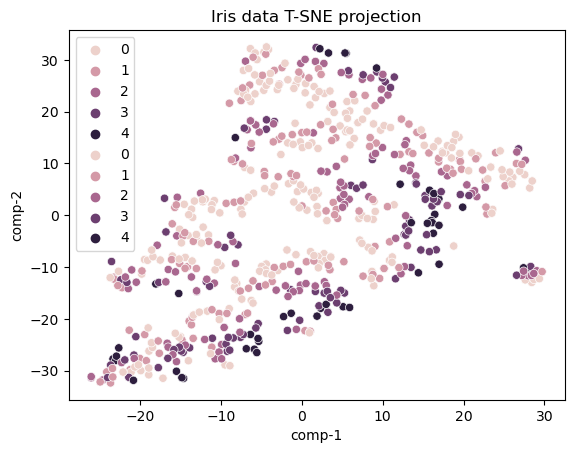

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),           
                data=df).set(title="Iris data T-SNE projection") 
plt.show()